# **Step 1: Data Cleaning**

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv("NYC_schools.csv")

In [4]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.columns

Index(['school_name', 'borough', 'building_code', 'average_math',
       'average_reading', 'average_writing', 'percent_tested'],
      dtype='object')

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64


In [6]:
# Drop rows where 'average_math' is missing (if any)
df = df.dropna(subset=['average_math'])
df

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


In [7]:
# Fill missing 'percent_tested' with the median (or use other strategy)
df['percent_tested'] = df['percent_tested'].fillna(df['percent_tested'].median())

In [8]:
# Confirm changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   375 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB
None


# **Step 2: Exploratory Data Analysis (EDA)**

### Descriptive Statistics

In [9]:
# Summary statistics
print(df.describe())

       average_math  average_reading  average_writing  percent_tested
count    375.000000       375.000000       375.000000      375.000000
mean     432.944000       424.504000       418.458667       64.966933
std       71.952373        61.881069        64.548599       18.239517
min      317.000000       302.000000       284.000000       18.500000
25%      386.000000       386.000000       382.000000       52.150000
50%      415.000000       413.000000       403.000000       64.800000
75%      458.500000       445.000000       437.500000       78.850000
max      754.000000       697.000000       693.000000      100.000000


In [10]:
# Unique boroughs
print("Boroughs:", df['borough'].unique())

Boroughs: ['Manhattan' 'Staten Island' 'Bronx' 'Queens' 'Brooklyn']


### Average Math Scores by Borough

In [11]:
# Average math score by borough
borough_math_avg = df.groupby('borough')['average_math'].mean().sort_values(ascending=False)
print("Average Math Scores by Borough:\n", borough_math_avg)

Average Math Scores by Borough:
 borough
Staten Island    486.200000
Queens           462.362319
Manhattan        455.887640
Brooklyn         416.403670
Bronx            404.357143
Name: average_math, dtype: float64


### Top 10 Performing Schools in Math

In [12]:
top_10_schools = df.sort_values(by='average_math', ascending=False).head(10)
print("Top 10 Schools by Average Math Score:\n", top_10_schools[['school_name', 'borough', 'average_math']])

Top 10 Schools by Average Math Score:
                                            school_name        borough  \
88                              Stuyvesant High School      Manhattan   
170                       Bronx High School of Science          Bronx   
93                 Staten Island Technical High School  Staten Island   
365  Queens High School for the Sciences at York Co...         Queens   
68   High School for Mathematics, Science, and Engi...      Manhattan   
280                     Brooklyn Technical High School       Brooklyn   
333                        Townsend Harris High School         Queens   
174  High School of American Studies at Lehman College          Bronx   
0    New Explorations into Science, Technology and ...      Manhattan   
45                       Eleanor Roosevelt High School      Manhattan   

     average_math  
88            754  
170           714  
93            711  
365           701  
68            683  
280           682  
333           680

# **Step 3: Data Visualization**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Set visual style
sns.set(style="whitegrid")

<ipython-input-15-390074633>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=borough_math_avg.index, y=borough_math_avg.values, palette="Blues_d")


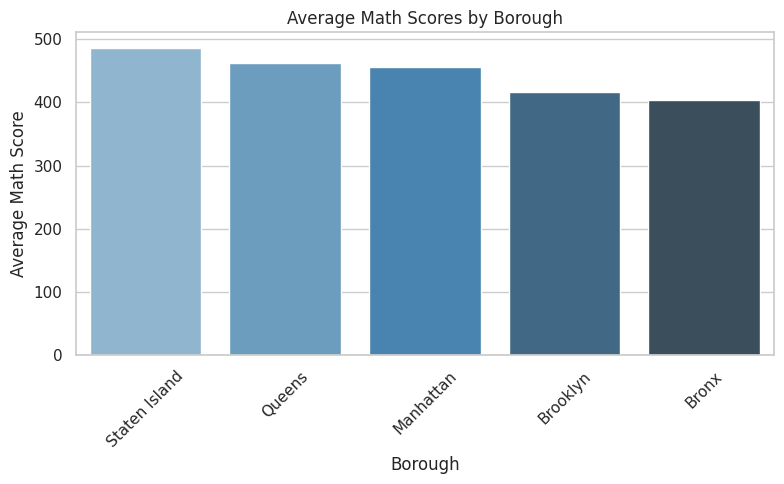

In [15]:
# Barplot: Average Math Scores by Borough
plt.figure(figsize=(8, 5))
sns.barplot(x=borough_math_avg.index, y=borough_math_avg.values, palette="Blues_d")
plt.title("Average Math Scores by Borough")
plt.ylabel("Average Math Score")
plt.xlabel("Borough")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

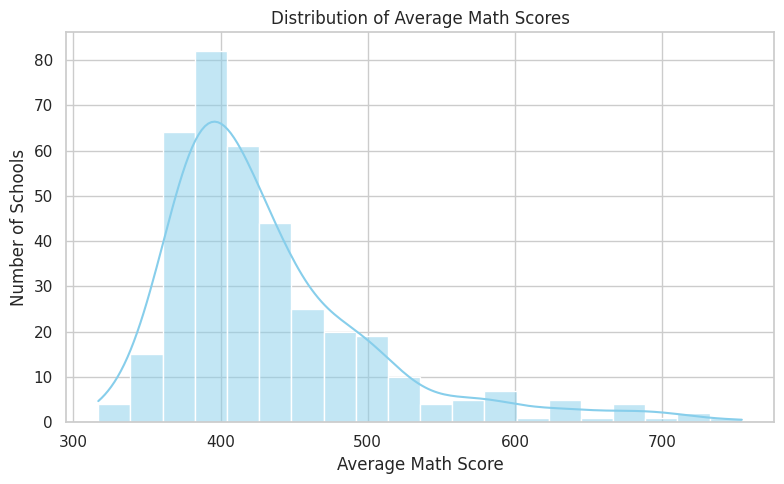

In [16]:
# Histogram: Distribution of Math Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['average_math'], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Average Math Scores")
plt.xlabel("Average Math Score")
plt.ylabel("Number of Schools")
plt.tight_layout()
plt.show()

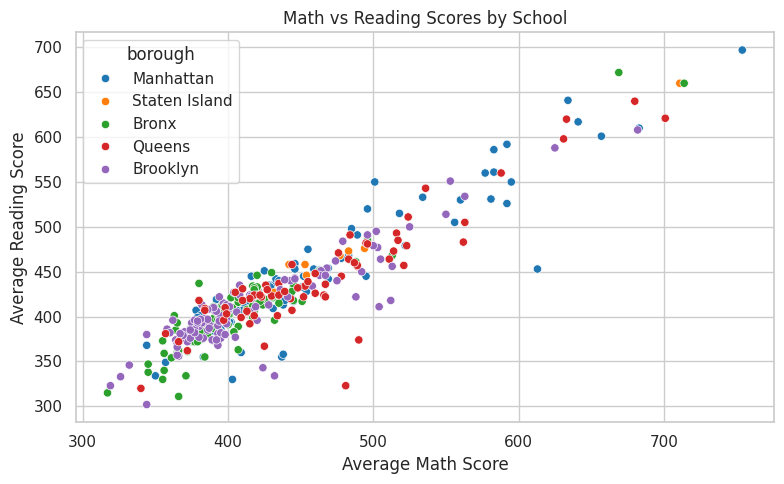

In [17]:
# Scatter plot: Math vs Reading scores
plt.figure(figsize=(8, 5))
sns.scatterplot(x='average_math', y='average_reading', hue='borough', data=df, palette='tab10')
plt.title("Math vs Reading Scores by School")
plt.xlabel("Average Math Score")
plt.ylabel("Average Reading Score")
plt.tight_layout()
plt.show()

The borough "Manhattan" has the highest average math performance

In [18]:
# Display correlation coefficient
correlation = df['average_math'].corr(df['average_reading'])
print(f"Correlation between Math and Reading scores: {correlation:.2f}")

Correlation between Math and Reading scores: 0.93
